This notebook is for debuging of dataset class.

In [6]:
from pathlib import Path

import torch
from omegaconf import OmegaConf
from PIL import Image
import numpy as np

from src.dataset.dataset import SyntheticCuneiformLineImage
from src.model.converter import LabelConverter
from src.model.converter import LabelConverter
from src.model.rare import Rare, show_atten_mask

In [7]:
import torchvision.transforms as T

transform = T.Compose(
    [
        #           T.ToTensor(),
        T.Pad(padding=(0, 16)),
        T.RandomApply(
            transforms=[T.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5))], p=0.3
        ),
        T.RandomRotation(degrees=(0, 3)),
                   T.RandomApply(
                       transforms=[T.AugMix()],
                       p=0.3
                   ),
        T.Resize(96),
        # T.Grayscale(),
        T.ToTensor(),
    ]
)

In [8]:
REPO_ROOT = ""

dataset = SyntheticCuneiformLineImage(
        target_signs_file_path=str("dataset/target_hittite_cuneiform_signs.json"),
        images_root_dir="dataset/images",
        texts_root_dir="dataset/annotations",
        label_max_length=45,
        first_idx=100000,
        last_idx=100005,
        transform=transform,
    )


model_cfg = OmegaConf.load("config/rare.yaml")
test_cfg = OmegaConf.load("config/test.yaml")
cfg = OmegaConf.merge(model_cfg, test_cfg)
rare = Rare(cfg).to("cpu")
rare.load_state_dict(torch.load("last.pth", map_location="cpu"))
rare.eval()

converter = LabelConverter(cfg.rare.label_max_length, "dataset/target_hittite_cuneiform_signs.json")

target : ['ḪAR', 'NA', 'A', 'Ú', 'I', ' ', 'SİLA', 'UD', ' ', 'PA', 'RA', 'A']
output : ['ḪAR', 'NA', 'A', 'Ú', 'I', ' ', 'SİLA', 'UD', ' ', 'PA', 'RA', 'A']


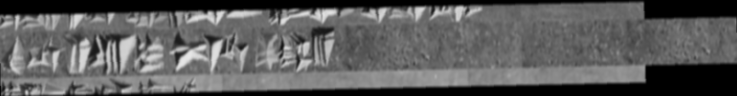

In [9]:
image, target = dataset.__getitem__(0)



image = image.to("cpu")
with torch.cuda.amp.autocast():
    output, alphas = rare.predict(image.unsqueeze(0))

target = dataset._converter.decode(target.numpy().tolist())
print(f"target : {target[1:]}")

output = output.squeeze().cpu().numpy()
output = converter.decode(output)
print(f"output : {output}")

T.ToPILImage()(image)

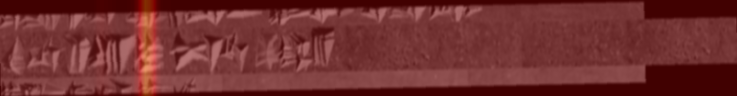

In [20]:
TIME_STEP = 4

img_arr = image.numpy().transpose(1, 2, 0) * 255
img_arr = img_arr.astype(np.uint8)
overlay = show_atten_mask(img_arr, alphas[TIME_STEP], 0.5)
Image.fromarray(overlay)

target : ['A', 'IGI', 'PI', 'AZ']
output : ['A', 'IGI', 'PI', 'AZ']


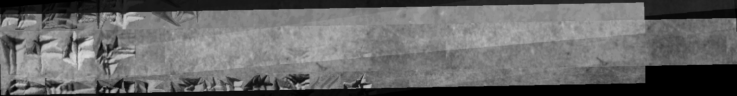

In [29]:
image, target = dataset.__getitem__(1)

image = image.to("cpu")
with torch.cuda.amp.autocast():
    output, _ = rare.predict(image.unsqueeze(0))

target = dataset._converter.decode(target.numpy().tolist())
print(f"target : {target[1:]}")

output = output.squeeze().cpu().numpy()
output = converter.decode(output)
print(f"output : {output}")

T.ToPILImage()(image)

target : ['ZA', 'NI', 'IR']
output : ['ZA', 'NI', 'IR']


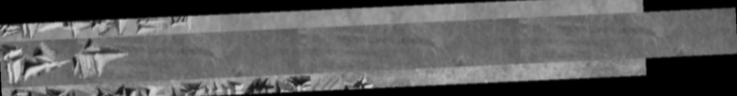

In [30]:
image, target = dataset.__getitem__(2)


image = image.to("cpu")
with torch.cuda.amp.autocast():
    output, _ = rare.predict(image.unsqueeze(0))

target = dataset._converter.decode(target.numpy().tolist())
print(f"target : {target[1:]}")

output = output.squeeze().cpu().numpy()
output = converter.decode(output)
print(f"output : {output}")

T.ToPILImage()(image)

target : ['A', 'PI', 'A', 'AD', ' ', 'A', 'BI', 'IA', ' ', 'AR', 'ḪA', 'A', 'AN', ' ', 'ḪAR', 'TE', 'NI', 'I']
output : ['A', 'PI', 'A', 'AD', ' ', 'A', 'BI', 'IA', ' ', 'AR', 'ḪA', 'A', 'AN', ' ', 'ḪAR', 'TE', 'NI', 'I']


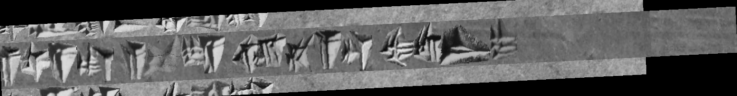

In [31]:
image, target = dataset.__getitem__(3)


image = image.to("cpu")
with torch.cuda.amp.autocast():
    output, _ = rare.predict(image.unsqueeze(0))

target = dataset._converter.decode(target.numpy().tolist())
print(f"target : {target[1:]}")

output = output.squeeze().cpu().numpy()
output = converter.decode(output)
print(f"output : {output}")

T.ToPILImage()(image)

target : ['ḪA', 'AB', 'PA', ' ', 'AN', 'DA', ' ', 'ŠE', 'IŠ', 'TE', 'EN']
output : ['ḪA', 'AB', 'PA', ' ', 'AN', 'DA', ' ', 'ŠE', 'IŠ', 'TE', 'EN']


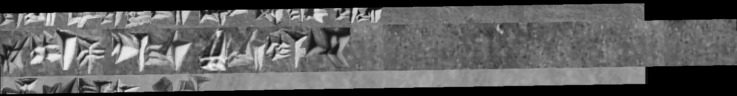

In [32]:
image, target = dataset.__getitem__(4)



image = image.to("cpu")
with torch.cuda.amp.autocast():
    output, alpha = rare.predict(image.unsqueeze(0))

target = dataset._converter.decode(target.numpy().tolist())
print(f"target : {target[1:]}")

output = output.squeeze().cpu().numpy()
output = converter.decode(output)
print(f"output : {output}")

T.ToPILImage()(image)

target : ['KU', 'IŠ', ' ', 'GIŠ', 'KU', ' ', 'NU', 'UŠ', 'GÁN', ' ', 'A', 'BI', 'GIŠ', 'ZA', ' ', 'ZI']
output : ['KU', 'IŠ', ' ', 'GIŠ', 'KU', ' ', 'NU', 'UŠ', 'GÁN', ' ', 'A', 'BI', 'GIŠ', 'ZA', ' ', 'ZI']


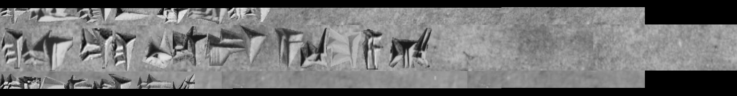

In [33]:
image, target = dataset.__getitem__(5)


image = image.to("cpu")
with torch.cuda.amp.autocast():
    output, alpha = rare.predict(image.unsqueeze(0))

target = dataset._converter.decode(target.numpy().tolist())
print(f"target : {target[1:]}")

output = output.squeeze().cpu().numpy()
output = converter.decode(output)
print(f"output : {output}")

T.ToPILImage()(image)